# Gyakori elemhalmazok előállítása



----


A gyakori elemhalmazok keresése elvileg az elemhalmazháló bejárásaként is tekinthető. A bejárás komplexitása exponenciális.

## Apriori-elv


Ha egy elemhalmaz gyakori, akkor ezen elemhalmaz összes részhalmaza is gyakori.
Az apriori-elv alkalmazásával a részhalmazok exponenciális keresési tere csökkenthető. 

## Apriori algoritmus


A laborgyakorlatban az apriori algoritmus Python [implmentációját](https://pypi.org/project/apyori/) próbáljuk ki. 

Az Apriori algoritmus a legismertebbgyakori elemhalmaz keresésére alkalmas módszer. Szélességi bejárást valósít meg: az üres halmazból kiindulva szintenként halad előre a nagyobb méretű gyakori elemhalmazok meghatározásához. Minden iterációban az eggyel nagyobb méretű elemhalmazokkal foglalkozik, így az iterációk száma legfeljebb eggyel több, mint a legnagyobb gyakori elemhalmaz mérete.

In [1]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=f850d6cfcbdbae28f524fa8a8317d0e62a1bfb2be9ea0b4bcc25b9b5de7015ce
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [2]:
from google.colab import files
files.upload()

Saving store_data_apriori.csv to store_data_apriori.csv


{'store_data_apriori.csv': b'shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil\nburgers,meatballs,eggs\nchutney\nturkey,avocado\nmineral water,milk,energy bar,whole wheat rice,green tea\nlow fat yogurt\nwhole wheat pasta,french fries\nsoup,light cream,shallot\nfrozen vegetables,spaghetti,green tea\nfrench fries\neggs,pet food\ncookies\nturkey,burgers,mineral water,eggs,cooking oil\nspaghetti,champagne,cookies\nmineral water,salmon\nmineral water\nshrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt\nturkey,eggs\nturkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea,salmon,eggs,chicken,extra dark chocolate\nmeatballs,milk,honey,french fries,protein bar\nred wine,shrimp,pasta,pepper,eggs,chocolate,shampoo\nrice,sparkling water\nspaghetti,mineral water,ham,body spray,pancakes,green tea\nburgers,grated 

Importáljuk a könyvtárakat (az apriori az apyori-ból is). 

In [3]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from apyori import apriori 

Olvassuk be a *store_data_apriori.csv* állományt.

In [4]:
store_data = pd.read_csv('./store_data_apriori.csv') 

Hány tranzakciót tartalmaz a fájl?

In [5]:
store_data

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Melyik a leghosszabb tranzakció (hány elemű)?

In [6]:
store_data.count(axis=1).max()

19

Mi az átlag tranzakció hossza (általában hány terméket vásárolnak)?

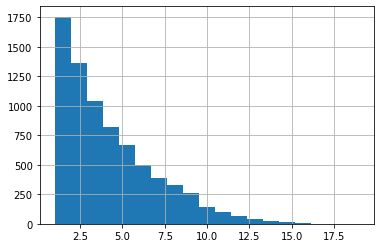

In [7]:
store_data.count(axis=1).hist(bins=19)

Hány különböző termék került eladásra?

In [16]:
all_items = np.concatenate(store_data.values)
all_items = [x for x in all_items if (str(x)!='nan')]
unique_items = np.unique(all_items)
len(unique_items)

120

Hány különböző termék került eladásra?

In [17]:
all_items = np.concatenate(store_data.values)
all_items = [x for x in all_items if (str(x)!='nan')]
unique_items = np.unique(all_items)
len(unique_items)

120

Melyik terméket hányszor adták el?

In [18]:
from collections import Counter
eladasok = Counter(all_items)
eladasok_df = pd.DataFrame.from_dict(eladasok,orient='index')
eladasok_df.sort_values(0,inplace=True,ascending=False)
eladasok_df.head()

,0
mineral water,1787
eggs,1348
spaghetti,1306
french fries,1282
chocolate,1230


Átlagban egy terméket hányszor adtak el?

In [19]:
eladasok_df.mean(axis=0)

0    244.525
dtype: float64

Ábrázoljuk a termékeladások eloszlását (hisztogram).

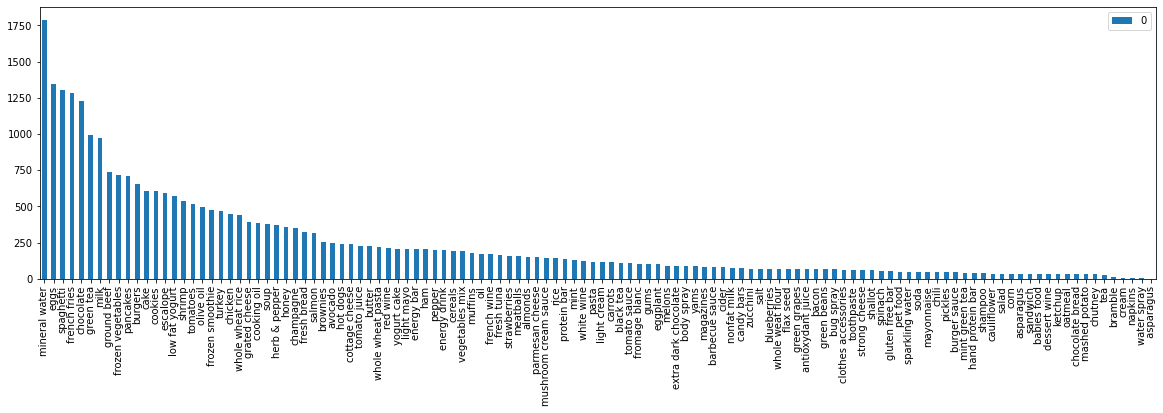

In [20]:
eladasok_df.plot.bar(figsize=(20,5))

Az  apriori algoritmus bemenete egy  listákat tartalamazó lista. Alakítsuk át a dataframet "list of lists"-re.

In [21]:
records = []  
for transaction in store_data.values:
  t=[x for x in transaction if str(x) != 'nan']
  records.append(t)


In [22]:
for r in records:
  print(r)

A streamkimeneten csak az utolsó 5000 sor látható.
['cake']
['cereals']
['escalope', 'pasta', 'mushroom cream sauce']
['olive oil', 'light mayo']
['cottage cheese']
['herb & pepper', 'ground beef', 'champagne', 'green tea']
['hot dogs']
['spaghetti', 'french fries', 'energy drink']
['ham', 'shrimp', 'ground beef', 'mineral water', 'avocado', 'milk', 'brownies', 'protein bar']
['mineral water', 'almonds', 'cottage cheese', 'light mayo']
['protein bar']
['red wine', 'candy bars']
['mineral water', 'avocado', 'milk', 'almonds', 'eggs', 'french fries', 'melons']
['herb & pepper']
['vegetables mix', 'escalope']
['tomatoes', 'milk']
['milk', 'salmon']
['eggs']
['mineral water', 'vegetables mix', 'rice', 'light mayo']
['vegetables mix']
['muffins', 'cookies', 'green tea']
['grated cheese', 'spinach', 'eggs', 'cooking oil', 'green tea', 'salad']
['strawberries']
['mineral water', 'cake', 'chicken', 'french fries', 'tomato juice']
['mineral water', 'cereals']
['chocolate', 'french fries']
['bur

Válasszuk meg a `min_support`, `min_confidence`, `min_lift`, `min_length` paramétereket és számoljuk ki a gyakori  elemhalmazokat. 

In [23]:
rules=apriori(records)

for r in rules:
  print(r)

RelationRecord(items=frozenset({'chocolate'}), support=0.16386666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'chocolate'}), confidence=0.16386666666666666, lift=1.0)])
RelationRecord(items=frozenset({'eggs'}), support=0.17973333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'eggs'}), confidence=0.17973333333333333, lift=1.0)])
RelationRecord(items=frozenset({'french fries'}), support=0.17093333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'french fries'}), confidence=0.17093333333333333, lift=1.0)])
RelationRecord(items=frozenset({'green tea'}), support=0.132, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'green tea'}), confidence=0.132, lift=1.0)])
RelationRecord(items=frozenset({'milk'}), support=0.1296, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'milk'}), confidence=0.1

Hogyan változik az elemhalmazok száma a `min_support`, `min_confidence`, `min_lift`, `min_length` paraméterek változtatásával? 

In [24]:
rules = apriori(records,min_support=0.006,min_confidence=0.005,min_lift=2,min_length=3)
for i in rules:
  print(i)

RelationRecord(items=frozenset({'milk', 'cereals'}), support=0.007066666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cereals'}), items_add=frozenset({'milk'}), confidence=0.27461139896373055, lift=2.118915115460884), OrderedStatistic(items_base=frozenset({'milk'}), items_add=frozenset({'cereals'}), confidence=0.05452674897119342, lift=2.118915115460884)])
RelationRecord(items=frozenset({'chicken', 'cooking oil'}), support=0.0068, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'cooking oil'}), confidence=0.11333333333333333, lift=2.219321148825065), OrderedStatistic(items_base=frozenset({'cooking oil'}), items_add=frozenset({'chicken'}), confidence=0.1331592689295039, lift=2.219321148825065)])
RelationRecord(items=frozenset({'frozen vegetables', 'shrimp'}), support=0.016666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen vegetables'}), items_add=frozenset({'shrimp'}), confidence=0.174